In [ ]:
import pandas as pd
import plotly.express as px

# Load your dataset
df = pd.read_csv("../data/security_incidents.csv")  # adjust path if needed

# Filter to valid coordinates
df_map = df.dropna(subset=["Latitude", "Longitude"])

# Create the interactive map
fig = px.scatter_geo(
    df_map,
    lat="Latitude",
    lon="Longitude",
    hover_name="Country",
    hover_data={
        "Year": True,
        "City": True,
        "Means of attack": True,
        "Actor name": True
    },
    opacity=0.4,
    color_discrete_sequence=["red"],
    title="Global Incident Heatmap of Attacks on Humanitarian Workers (1997–2025)"
)

fig.update_layout(
    geo=dict(showland=True, landcolor="rgb(240, 240, 240)", showcountries=True),
    title_font_size=20,
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3021551318.py, line 13)

# Introduction.qmd

/tmp/ipykernel_16962/4145160311.py:24: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsolata' not found.
findfont: Font family 'Inconsola

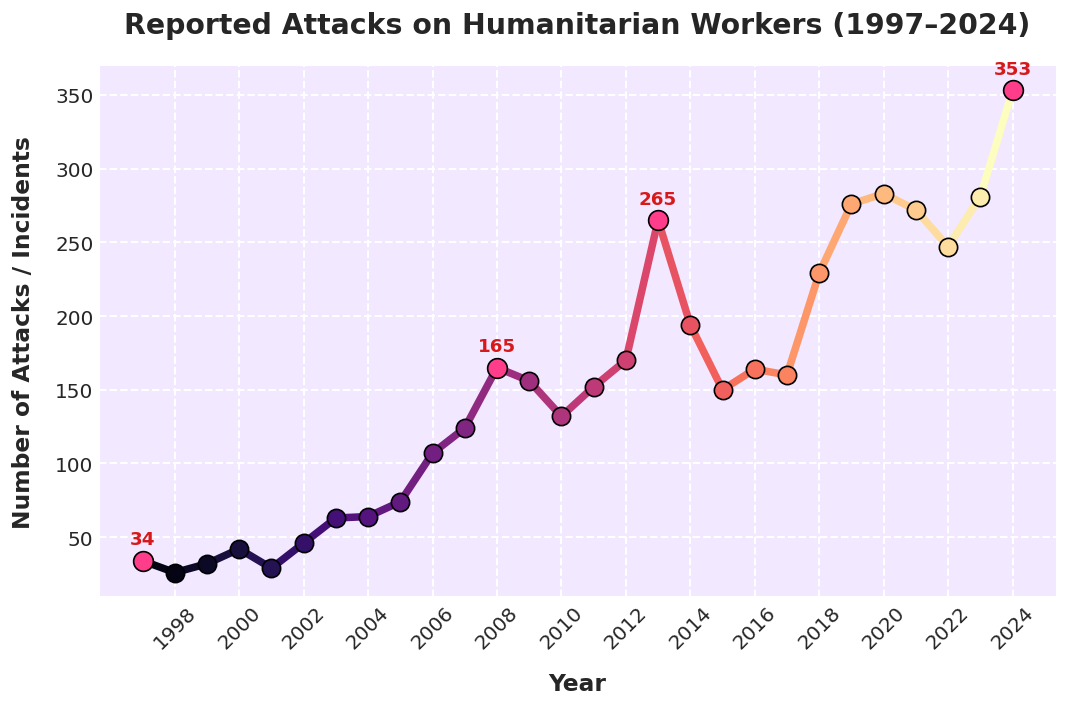

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import os

# ======================
# DATA PREPARATION
# ======================
df = pd.read_csv("../data/security_incidents.csv")
df = df[df['Year'] != 2025]  # Remove future year
yearly = df.groupby("Year").size().reset_index(name="Incident Count")

# Normalize years for color mapping
norm = mcolors.Normalize(vmin=yearly["Year"].min(), vmax=yearly["Year"].max())
cmap = cm.get_cmap("magma")

# ======================
# VISUALIZATION
# ======================
plt.figure(figsize=(9, 6), dpi=120)

# Draw line segments between each point, colored by year
for i in range(1, len(yearly)):
    x_vals = [yearly["Year"].iloc[i - 1], yearly["Year"].iloc[i]]
    y_vals = [yearly["Incident Count"].iloc[i - 1], yearly["Incident Count"].iloc[i]]
    color = cmap(norm(yearly["Year"].iloc[i]))
    plt.plot(x_vals, y_vals, color=color, linewidth=4.5, zorder=1)

# Plot each point with its own color
for i, row in yearly.iterrows():
    plt.scatter(
        row["Year"], row["Incident Count"],
        color=cmap(norm(row["Year"])),
        edgecolor="black",
        s=120,
        zorder=2
    )

# Highlight specific years
highlight_years = [1997, 2008, 2013, 2024]
highlight_data = yearly[yearly['Year'].isin(highlight_years)]
for _, row in highlight_data.iterrows():
    plt.scatter(
        row['Year'],
        row['Incident Count'],
        color='#ff3d8b',
        s=140,
        edgecolor='black',
        zorder=5
    )
    plt.annotate(
        f"{row['Incident Count']}",
        xy=(row['Year'], row['Incident Count']),
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=11,
        weight='bold',
        ha='center',
        color='#d7191c'
    )

# Titles and styling
plt.title(
    "Reported Attacks on Humanitarian Workers (1997–2024)",
    fontsize=17, fontweight='bold', pad=20
)
plt.xlabel("Year", fontsize=14, labelpad=12)
plt.ylabel("Number of Attacks / Incidents", fontsize=14, labelpad=12)

# Bold axis labels
plt.xlabel("Year", fontsize=14, labelpad=12, fontweight='bold')
plt.ylabel("Number of Attacks / Incidents", fontsize=14, labelpad=12, fontweight='bold')

# Thicker, white axis lines
ax = plt.gca()
for spine in ['bottom', 'left']:
    ax.spines[spine].set_linewidth(1.5)
    ax.spines[spine].set_color('white')


even_years = [year for year in yearly['Year'] if year % 2 == 0]
plt.xticks(even_years, rotation=45 if len(even_years) > 8 else 0)
plt.tick_params(axis='both', which='major', labelsize=12)

for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)
# Gentle lavender background
plt.gca().set_facecolor('#f2e8ff')

ax = plt.gca()
ax.grid(True, linestyle='--', linewidth=1.2, color='white')
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')


# ======================
# SAVE OUTPUT
# ======================
os.makedirs('../assets/introduction', exist_ok=True)
plt.tight_layout()
plt.savefig(
    '../assets/introduction/timeline_attacks.png',
    bbox_inches='tight',
    dpi=120,
    facecolor=plt.gca().get_facecolor(),
    transparent=False
)
plt.show()

In [20]:
import pandas as pd
import plotly.express as px
import os

# Load data
df = pd.read_csv("../data/security_incidents.csv")

# Filter valid years and months
df = df[(df["Year"].between(1997, 2024)) & (~df["Month"].isna())]
df["Month"] = df["Month"].astype(int)
df["Date"] = pd.to_datetime(df[["Year", "Month"]].assign(Day=1))

# Fill NA in casualty columns
casualty_cols = [
    "Nationals killed", "Internationals killed",
    "Nationals wounded", "Internationals wounded"
]
df[casualty_cols] = df[casualty_cols].fillna(0)

# Group by month
monthly_group = df.groupby("Date")[
    ["Nationals killed", "Internationals killed", "Nationals wounded", "Internationals wounded"]
].sum().reset_index()

# Melt for fatalities
killed_melted = monthly_group.melt(
    id_vars="Date",
    value_vars=["Nationals killed", "Internationals killed"],
    var_name="Group",
    value_name="Fatalities"
)

# Melt for wounded
wounded_melted = monthly_group.melt(
    id_vars="Date",
    value_vars=["Nationals wounded", "Internationals wounded"],
    var_name="Group",
    value_name="Wounded"
)

# Animated bar chart for fatalities
fig_killed = px.bar(
    killed_melted,
    x="Group",
    y="Fatalities",
    animation_frame=killed_melted["Date"].dt.strftime("%b %Y"),
    range_y=[0, killed_melted["Fatalities"].max() + 5],
    color="Group",
    title="Monthly Aid Worker Fatalities Over Time (1997–2024)",
    color_discrete_map={
        "Nationals killed": "#d62728",
        "Internationals killed": "#1f77b4"
    }
)

# Animated bar chart for wounded
fig_wounded = px.bar(
    wounded_melted,
    x="Group",
    y="Wounded",
    animation_frame=wounded_melted["Date"].dt.strftime("%b %Y"),
    range_y=[0, wounded_melted["Wounded"].max() + 5],
    color="Group",
    title="Monthly Aid Worker Injuries Over Time (1997–2024)",
    color_discrete_map={
        "Nationals wounded": "#d62728",
        "Internationals wounded": "#1f77b4"
    }
)

# Ensure output folder exists
output_dir = "../assets/introduction"
os.makedirs(output_dir, exist_ok=True)

# Save as HTML
fatalities_path = f"{output_dir}/timeline_fatalities.html"
wounded_path = f"{output_dir}/timeline_wounded.html"
fig_killed.write_html(fatalities_path)
fig_wounded.write_html(wounded_path)

fatalities_path, wounded_path

('../assets/introduction/timeline_fatalities.html',
 '../assets/introduction/timeline_wounded.html')

In [41]:
import pandas as pd
import plotly.express as px
import os

# Load and prep data
df = pd.read_csv("../data/security_incidents.csv")
df = df[(df["Year"].between(1997, 2024)) & (~df["Month"].isna())]
df["Month"] = df["Month"].astype(int)
df["Date"] = pd.to_datetime(df[["Year", "Month"]].assign(Day=1))

# Fill missing values
casualty_cols = [
    "Nationals killed", "Internationals killed",
    "Nationals wounded", "Internationals wounded"
]
df[casualty_cols] = df[casualty_cols].fillna(0)

# Group monthly totals
monthly = df.groupby("Date")[casualty_cols].sum().reset_index()

# Convert to long format
fatalities_long = monthly.melt(
    id_vars="Date",
    value_vars=["Nationals killed", "Internationals killed"],
    var_name="Group",
    value_name="Fatalities"
)

wounded_long = monthly.melt(
    id_vars="Date",
    value_vars=["Nationals wounded", "Internationals wounded"],
    var_name="Group",
    value_name="Wounded"
)

# Use readable string frame but cumulative by actual Date
def expand_cumulative(df, value_col):
    frames = []
    unique_frames = df["Date"].sort_values().unique()
    for i, date in enumerate(unique_frames):
        frame_df = df[df["Date"] <= date].copy()
        frame_df["Frame"] = date.strftime("%b %Y")  # readable frame
        frames.append(frame_df)
    return pd.concat(frames)

fatalities_cumulative = expand_cumulative(fatalities_long, "Fatalities")
wounded_cumulative = expand_cumulative(wounded_long, "Wounded")

# Animated line: Fatalities
fig_killed = px.line(
    fatalities_cumulative,
    x="Date", y="Fatalities", color="Group",
    animation_frame="Frame", title="Animated Monthly Fatalities (Cumulative)",
    color_discrete_map={
        "Nationals killed": "#d62728",
        "Internationals killed": "#1f77b4"
    }
)

fig_killed.update_traces(mode="lines")  # remove points

# Animated line: Wounded
fig_wounded = px.line(
    wounded_cumulative,
    x="Date", y="Wounded", color="Group",
    animation_frame="Frame", title="Animated Monthly Injuries (Cumulative)",
    color_discrete_map={
        "Nationals wounded": "#d62728",
        "Internationals wounded": "#1f77b4"
    }
)

fig_wounded.update_traces(mode="lines")  # remove points

# Save HTML
output_dir = "../assets/introduction"
os.makedirs(output_dir, exist_ok=True)
fig_killed.write_html(f"{output_dir}/timeline_fatalities_line.html")
fig_wounded.write_html(f"{output_dir}/timeline_wounded_line.html")